In [1]:
%matplotlib inline


# Diffuse Self-Shading

Modeling the reduction in diffuse irradiance caused by row-to-row diffuse
shading.


The term "self-shading" usually refers to adjacent rows blocking direct
irradiance and casting shadows on each other. However, the concept also
applies to diffuse irradiance because rows block a portion of the sky
dome even when the sun is high in the sky. The irradiance loss fraction
depends on how tightly the rows are packed and where on the module the
loss is evaluated -- a point near the top of edge of a module will see
more of the sky than a point near the bottom edge.

This example uses the approach presented by Passias and Källbäck in [1]_
and recreates two figures from that paper using
:py:func:`pvlib.shading.masking_angle_passias` and
:py:func:`pvlib.shading.sky_diffuse_passias`.

## References
 .. [1] D. Passias and B. Källbäck, "Shading effects in rows of solar cell
    panels", Solar Cells, Volume 11, Pages 281-291.  1984.
    DOI: 10.1016/0379-6787(84)90017-6



In [2]:
from pvlib import shading, irradiance
import matplotlib.pyplot as plt
import numpy as np

First we'll recreate Figure 4, showing how the average masking angle varies
with array tilt and array packing. The masking angle of a given point on a
module is the angle from horizontal to the next row's top edge and represents
the portion of the sky dome blocked by the next row. Because it changes
from the bottom to the top of a module, the average across the module is
calculated. In [1]_, ``k`` refers to the ratio of row pitch to row slant
height (i.e. 1 / GCR).



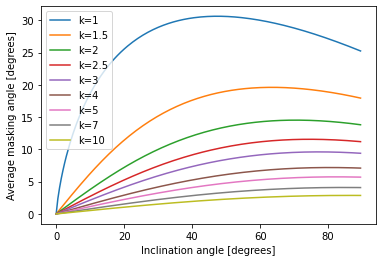

In [3]:
surface_tilt = np.arange(0, 90, 0.5)

plt.figure()
for k in [1, 1.5, 2, 2.5, 3, 4, 5, 7, 10]:
    gcr = 1/k
    psi = shading.masking_angle_passias(surface_tilt, gcr)
    plt.plot(surface_tilt, psi, label=f'k={k}')

plt.xlabel('Inclination angle [degrees]')
plt.ylabel('Average masking angle [degrees]')
plt.legend()
plt.show()

So as the array is packed tighter (decreasing ``k``), the average masking
angle increases.

Next we'll recreate Figure 5. Note that the y-axis here is the ratio of
diffuse plane of array irradiance (after accounting for shading) to diffuse
horizontal irradiance. This means that the deviation from 100% is due to the
combination of self-shading and the fact that being at a tilt blocks off
the portion of the sky behind the row. The first effect is modeled with
:py:func:`pvlib.shading.sky_diffuse_passias` and the second with
:py:func:`pvlib.irradiance.isotropic`.



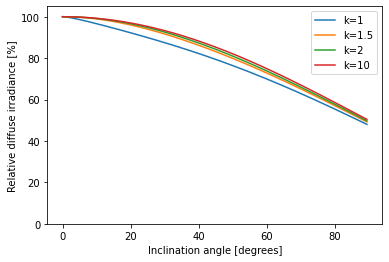

In [4]:
plt.figure()
for k in [1, 1.5, 2, 10]:
    gcr = 1/k
    psi = shading.masking_angle_passias(surface_tilt, gcr)
    shading_loss = shading.sky_diffuse_passias(psi)
    transposition_ratio = irradiance.isotropic(surface_tilt, dhi=1.0)
    relative_diffuse = transposition_ratio * (1-shading_loss) * 100  # %
    plt.plot(surface_tilt, relative_diffuse, label=f'k={k}')

plt.xlabel('Inclination angle [degrees]')
plt.ylabel('Relative diffuse irradiance [%]')
plt.ylim(0, 105)
plt.legend()
plt.show()

As ``k`` decreases, GCR increases, so self-shading loss increases and
collected diffuse irradiance decreases.

